# 0.0 IMPORTS

In [23]:
import math
import pandas as pd
import inflection
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

from IPython.display import Image



## 0.1 HELPER FUNCTIONS

## 0.2 LOADING DATA

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

In [3]:
#Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how= 'left', on = 'Store')

#  1.0. PASSO 01 -  DESCRIÇÃO DE DADOS

In [4]:
df1 = df_raw.copy()

## 1.1 RENAME COLUMNS

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map( snakecase, cols_old))

#Rename

df1.columns = cols_new


## 1.2  DATA DIMENSIONS

In [6]:
datad1 = df1.shape[0]
datad2 = df1.shape[1]

print (f'Number of row: {datad1} ')
print (f'Number of Columns: {datad2} ')

Number of row: 1017209 
Number of Columns: 18 


## 1.3  DATA TYPES

In [7]:
df1 ['date'] = pd.to_datetime (df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4  CHECK NA 

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5  FILLOUT NA 

In [9]:
# competition_distance              

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)   

# competition_open_since_month    

df1['competition_open_since_month'] = df1.apply (lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)


# competition_open_since_year     
df1['competition_open_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1 )

# promo2_since_week               

df1['promo2_since_week'] = df1.apply (lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis = 1 )

# promo2_since_year               

df1['promo2_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis = 1 )

# promo_interval  

month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace= True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split (',') else 0, axis = 1) 


## 1.6  CHANGE TYPES

In [10]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )


df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7  DESCRIPTIVE STATISTICAL

In [11]:
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

## 1.7.1 NUMERICAL ATTRIBUTES

In [12]:
# Central Tendency - mean, median 

ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Dispersion - min, max, std, skew, kurtosis, range 
d1 = pd.DataFrame (num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame (num_attributes.apply( min )).T
d3 = pd.DataFrame (num_attributes.apply( max )).T
d4 = pd.DataFrame (num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame (num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame (num_attributes.apply( lambda x: x.kurtosis() ) ).T


#Concatena 

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

m.columns = ['attributes', 'min', 'max','range', 'mean', 'median','std', 'skew', 'kurtosis']

m




,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## 1.7.2  CATEGORICAL ATTRIBUTES 

In [13]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

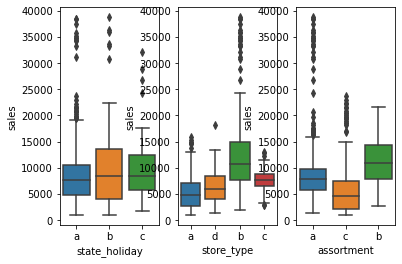

In [14]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot (1,3,1)
sns.boxplot( x= 'state_holiday', y='sales', data= aux1)

plt.subplot (1,3,2)
sns.boxplot( x= 'store_type', y='sales', data= aux1)

plt.subplot (1,3,3)
sns.boxplot( x= 'assortment', y='sales', data= aux1)



# 2.0. PASSO 02 - FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

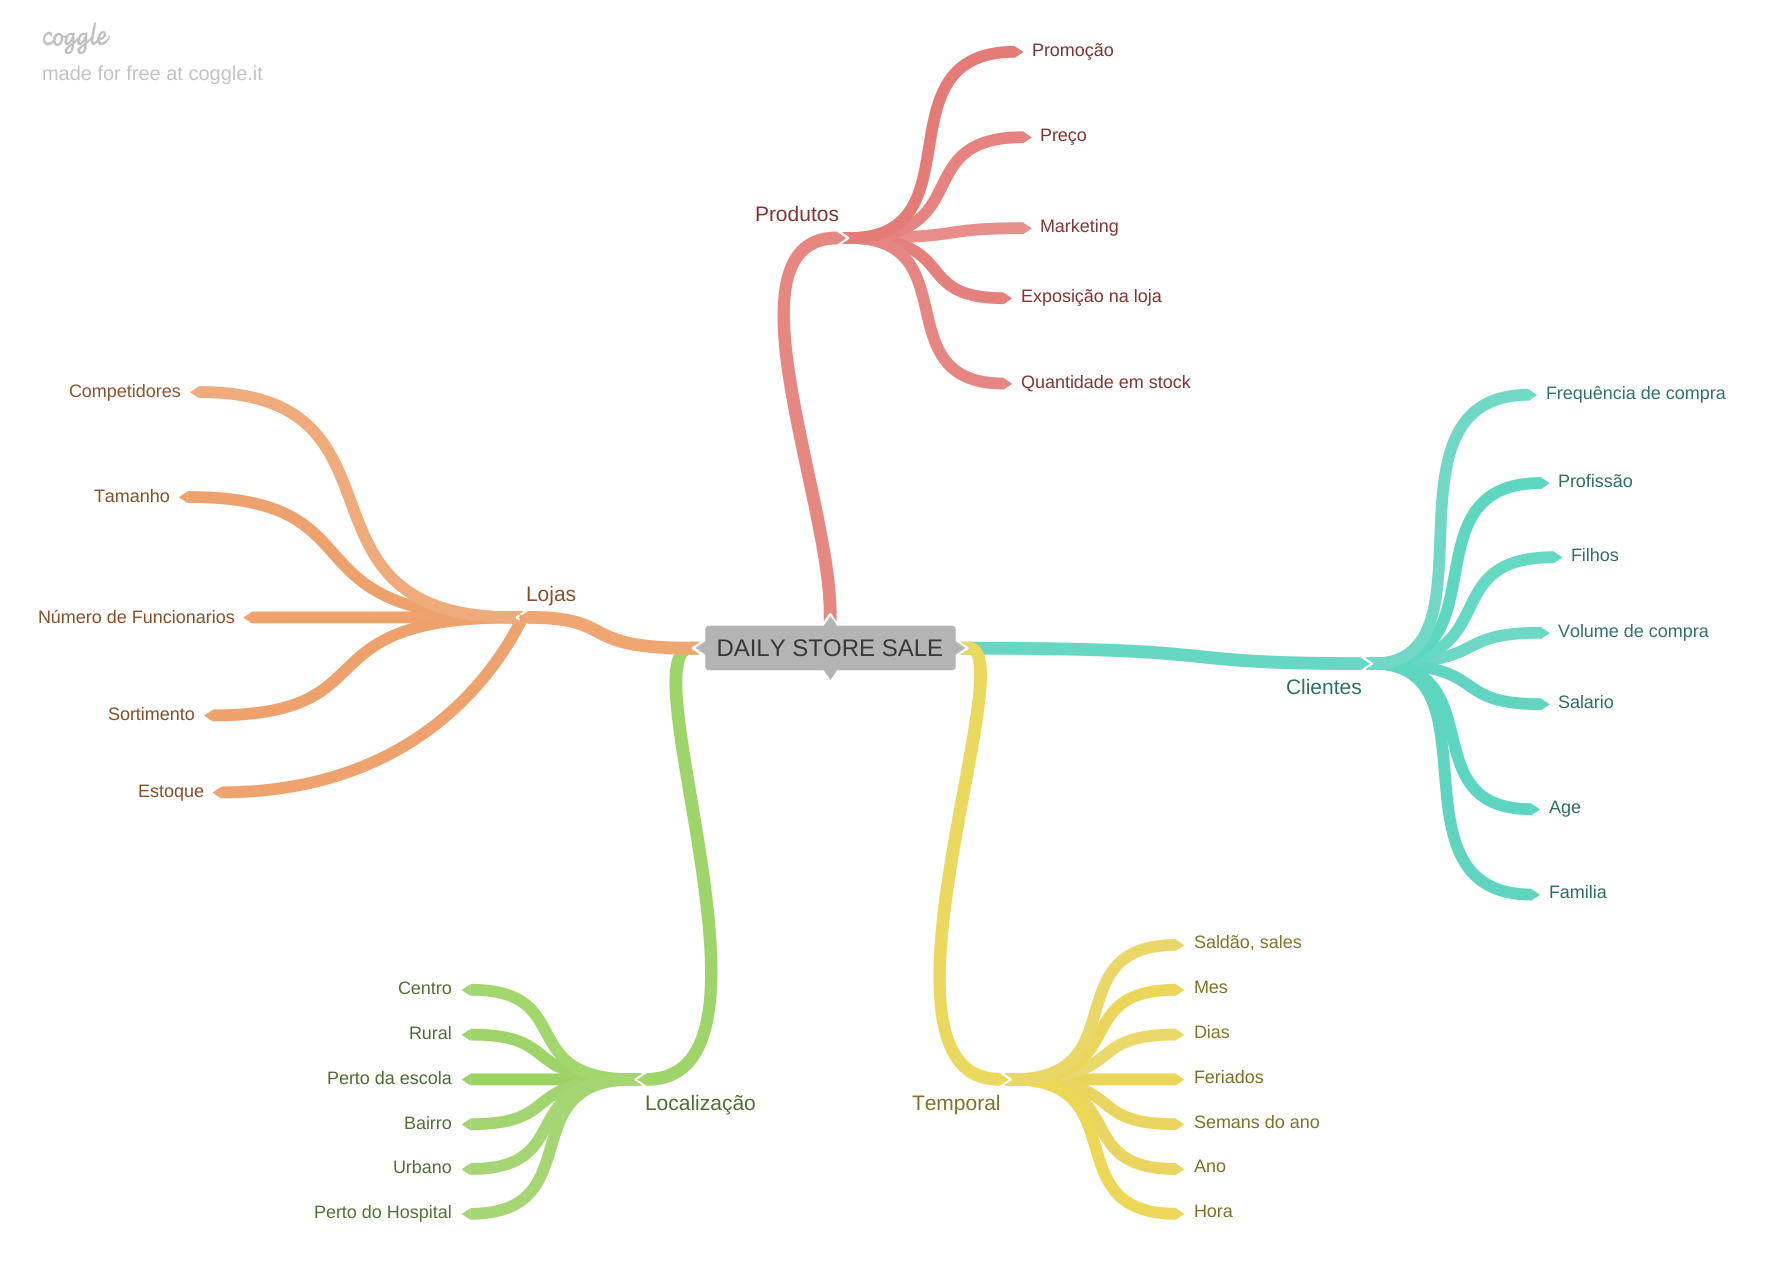

In [16]:
Image ('img/MindMap.png')

## 2.1 CRIANDO HIPOTESES

### 2.1.1 HIPOTESES LOJA

**1.** Lojas com um numero maior de funcionarios deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais perto deveriam vender menos.

**6.** Lojas com competidores a mais tempo deveriam vender mais.


### 2.1.2 HIPOTESES PRODUTO 

**1.** Lojas que invesem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas, deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo, deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.



### 2.1.1  HIPOTESES TEMPO 

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas  deveriam vender mais ao longo do anos.

**3.** Lojas  deveriam vender mais no segundo semestre do ano.

**4.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas  deveriam vender menos aos finais de semana.

**6.** Lojas  deveriam vender menos durante os feriados escolares.

## 2.2 LISTA FINAL DE HIPOTESES

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais perto deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo, deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas  deveriam vender mais ao longo do anos.

**9.** Lojas  deveriam vender mais no segundo semestre do ano.

**10.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas  deveriam vender menos aos finais de semana.

**12.** Lojas  deveriam vender menos durante os feriados escolares.




## 2.3 FEATURE ENGINEERING

In [37]:
# year
df2['year'] = df2['date'].dt.year

# month 
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week 
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')



# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1 ), axis = 1) 

df2['competition_time_month'] = (( df2['date'] - df2 ['competition_since'])/30 ).apply (lambda x: x.days).astype(int)


# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7) )

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/ 7).apply(lambda x: x.days).astype(int)


# assortment

df2 ['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday

df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')



In [39]:
df2.sample(10).T

,558985,733903,616351,175494,624777,235828,787205,910141,67534,924754
store,41,1019,542,440,48,564,801,1087,635,90
day_of_week,6,4,4,2,3,4,5,7,1,7
date,2014-02-15 00:00:00,2013-09-12 00:00:00,2013-12-26 00:00:00,2015-02-24 00:00:00,2013-12-18 00:00:00,2015-01-01 00:00:00,2013-07-26 00:00:00,2013-04-07 00:00:00,2015-06-01 00:00:00,2013-03-24 00:00:00
sales,4913,9759,0,4184,5957,0,4573,0,11465,0
customers,380,828,0,558,609,0,493,0,926,0
open,1,1,0,1,1,0,1,0,1,0
promo,0,1,0,0,1,0,0,0,1,0
state_holiday,regular_day,regular_day,christmas,regular_day,regular_day,public_holiday,regular_day,regular_day,regular_day,regular_day
school_holiday,0,0,1,0,0,1,1,0,0,0
store_type,d,d,a,d,a,d,d,d,a,a
